# Linear Regression

In [2]:
import pandas as pd
import numpy as np
pd.__version__

'2.2.2'

In [3]:
url = 'ames-housing-dataset.zip'
df = pd.read_csv(url, engine = 'pyarrow', dtype_backend='pyarrow')

In [4]:
(df
 .assign(
     **df.select_dtypes('string')
     .replace('','Not Applicable')
 ))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,...,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,...,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,...,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,...,0,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77,10010,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,170000


In [5]:
import pandas as pd
import numpy as np

def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes == 'int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ < 4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)

def clean_housing(df):
    return(df
           .assign(**df.select_dtypes('string').replace('','Missing').astype('category'),
                   **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper = df['Year Built'].max())})
           .pipe(shrink_ints))

data = 'ames-housing-dataset.zip'
raw = pd.read_csv(data)
housing = clean_housing(raw)

In [6]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# Linear Regression

Goals:

* Understand how to prepare data for linear regression by selecting the relevant numerical features and the target variable.
* Learn to split the data into training and testing sets using `train_test_split` 
* Evaluate the performance of the linear regression model

In [8]:
# target: SalesPrice, and the independent variables: other numeric features of the house, such as its size, number of rooms, etc.

from sklearn import linear_model, model_selection, preprocessing

x = housing.select_dtypes('number').drop(columns='SalePrice')
y = housing['SalePrice']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, random_state=42)

In [9]:
y_test

1357    161000
2367    116000
2822    196500
2126    123600
1544    126000
         ...  
2521    170000
707      80000
424     325000
69      262500
736     132500
Name: SalePrice, Length: 733, dtype: int64

In [10]:
x_train

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
844,845,907181100,20,68.0,9017,7,5,1999,1999,0.0,...,666.0,0,35,0,0,0,0,0,9,2009
2730,2731,905351045,150,NaN,1700,7,5,1980,1981,0.0,...,450.0,188,36,0,0,200,0,0,4,2006
2793,2794,907255050,20,NaN,14781,8,5,2001,2002,178.0,...,748.0,198,150,0,0,0,0,0,8,2006
1187,1188,534127230,20,85.0,11050,6,5,1968,1968,0.0,...,512.0,25,0,0,0,192,0,0,10,2008
2770,2771,907130110,60,65.0,12438,6,5,1995,1995,68.0,...,473.0,413,91,0,0,0,0,0,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1639,527226040,190,195.0,41600,5,5,1969,1990,0.0,...,828.0,144,0,0,0,0,0,0,11,2007
1095,1096,528290090,60,NaN,7750,7,5,2002,2002,NaN,...,403.0,100,35,0,0,0,0,0,4,2008
1130,1131,528490080,60,64.0,8791,6,5,2003,2003,0.0,...,673.0,216,56,0,0,0,0,0,5,2008
1294,1295,902109160,50,81.0,7308,5,5,1920,1950,0.0,...,225.0,0,0,236,0,0,0,0,6,2008


In [11]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:
x_train.isna().any()

Order              False
PID                False
MS SubClass        False
Lot Frontage        True
Lot Area           False
Overall Qual       False
Overall Cond       False
Year Built         False
Year Remod/Add     False
Mas Vnr Area        True
BsmtFin SF 1        True
BsmtFin SF 2        True
Bsmt Unf SF         True
Total Bsmt SF       True
1st Flr SF         False
2nd Flr SF         False
Low Qual Fin SF    False
Gr Liv Area        False
Bsmt Full Bath      True
Bsmt Half Bath      True
Full Bath          False
Half Bath          False
Bedroom AbvGr      False
Kitchen AbvGr      False
TotRms AbvGrd      False
Fireplaces         False
Garage Yr Blt       True
Garage Cars         True
Garage Area         True
Wood Deck SF       False
Open Porch SF      False
Enclosed Porch     False
3Ssn Porch         False
Screen Porch       False
Pool Area          False
Misc Val           False
Mo Sold            False
Yr Sold            False
dtype: bool

In [26]:
import pandas as pd
url = 'ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

def clean_housing_no_na(df):
    return(df
           .assign(**df.select_dtypes('string'). replace('', 'Missing').astype('category'),
                   **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
           .pipe(shrink_ints)
           .pipe(lambda df_: df_.assign(**df.select_dtypes('number').fillna(0)))
          )

housing2 = clean_housing_no_na(raw)

In [28]:
x = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2['SalePrice']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, random_state=42)

In [30]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8434483039084644

Here we have fitted the linear regression model to the training data (x_train, y_train), and then evaluating its performance on the test set using .score(), which typically returns the coefficient of determination (R²) for regression models.


R² score of 0.84 means the model explains 84% of the variance, which is generally considered a good result for a basic model.
- Model is fairly accurate in predicting the sales price, but note this score is "good enough" depends on the specific problem and the business context.

# Interpreting Linear Regression Models

In [33]:
lr.coef_    # m is the slope (coefficient)

array([-1.03814738e+01,  9.02411860e-07, -1.63050576e+02,  2.81284818e+01,
        4.92668567e-01,  1.73466716e+04,  4.84079679e+03,  3.91645014e+02,
        1.76965630e+02,  2.73066661e+01,  1.05967268e+01,  4.13482954e+00,
       -2.72937999e+00,  1.20021763e+01,  1.87157914e+01,  2.54896651e+01,
       -9.18032347e+00,  3.50251329e+01,  7.35666770e+03, -1.51315712e+03,
       -1.41742224e+02, -5.39960782e+03, -7.73039749e+03, -1.43271176e+04,
        1.36191997e+03,  3.51407523e+03, -1.31044446e+01,  1.03630326e+04,
        1.49225509e+01,  1.99789208e+01, -6.04065085e+00,  2.04208107e+01,
       -5.67776073e+00,  7.08392922e+01, -3.93865793e+01, -8.71867696e+00,
        2.35118730e+02, -8.15826993e+03])

In [35]:
lr.intercept_

15240773.746056011

In [37]:
lr.feature_names_in_

array(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype=object)

`lr.feature_names_in_`: shows the names of the features (columns) that were used to train your model.

In [39]:
pd.Series(lr.intercept_, index=lr.feature_names_in_)

Order              1.524077e+07
PID                1.524077e+07
MS SubClass        1.524077e+07
Lot Frontage       1.524077e+07
Lot Area           1.524077e+07
Overall Qual       1.524077e+07
Overall Cond       1.524077e+07
Year Built         1.524077e+07
Year Remod/Add     1.524077e+07
Mas Vnr Area       1.524077e+07
BsmtFin SF 1       1.524077e+07
BsmtFin SF 2       1.524077e+07
Bsmt Unf SF        1.524077e+07
Total Bsmt SF      1.524077e+07
1st Flr SF         1.524077e+07
2nd Flr SF         1.524077e+07
Low Qual Fin SF    1.524077e+07
Gr Liv Area        1.524077e+07
Bsmt Full Bath     1.524077e+07
Bsmt Half Bath     1.524077e+07
Full Bath          1.524077e+07
Half Bath          1.524077e+07
Bedroom AbvGr      1.524077e+07
Kitchen AbvGr      1.524077e+07
TotRms AbvGrd      1.524077e+07
Fireplaces         1.524077e+07
Garage Yr Blt      1.524077e+07
Garage Cars        1.524077e+07
Garage Area        1.524077e+07
Wood Deck SF       1.524077e+07
Open Porch SF      1.524077e+07
Enclosed

<Axes: >

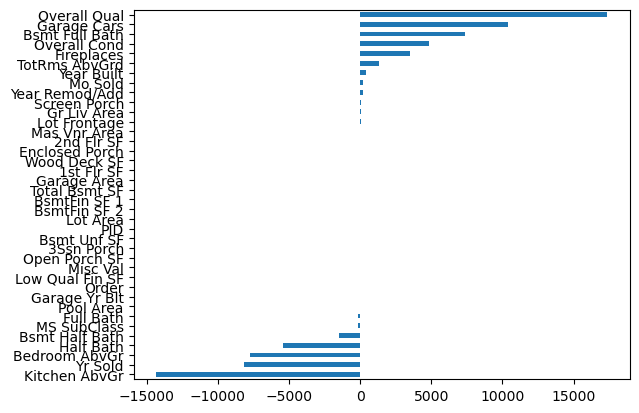

In [41]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values()
 .plot.barh())

<Axes: >

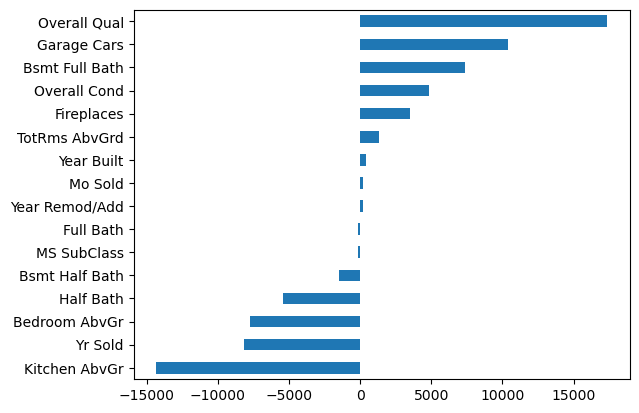

In [43]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs()>100])
 .plot.barh())

`coefficients` provide insight into the influence each feature has on the predicted outcome
- `Overall Quality` is positive, it means that as the "Overall Quality" value increases, the predicted price increases
- On the other hand, as the coefficient for `Kitchen Above Ground` is negative, suggesting that as this feature increases, the predicted price decreases

filter and display of only the coefficients that have the largest absolute values (greater than 100 in this case). This gives a focused view of the features that most strongly affect the model’s predictions

In [45]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs()>100])
 .index)

Index(['Kitchen AbvGr', 'Yr Sold', 'Bedroom AbvGr', 'Half Bath',
       'Bsmt Half Bath', 'MS SubClass', 'Full Bath', 'Year Remod/Add',
       'Mo Sold', 'Year Built', 'TotRms AbvGrd', 'Fireplaces', 'Overall Cond',
       'Bsmt Full Bath', 'Garage Cars', 'Overall Qual'],
      dtype='object')

# Standardizing Values

Goals:

* Understand the concept of standardization 
* Learn to use the `StandardScaler` class 
* Evaluate the impact of standardization on the performance of the linear regression model using the coefficient of determination (R-squared) score.
* Visualize the coefficients of the linear regression model using a horizontal bar plot.

In [47]:
x = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=42)

std = preprocessing.StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

StandardScaler is a transformer, which means it learns the statistics (like mean and standard deviation) from the training data and then applies these transformations to the data.

`Note:` *When transforming the testing data, we did not fit again. Instead, we only transform the test data using the statistics learned from the training data. This ensures that the model isn't "cheating" by using information from the testing set.*

In [49]:
# was .84 previously without standardizing

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8434463873885896

<Axes: >

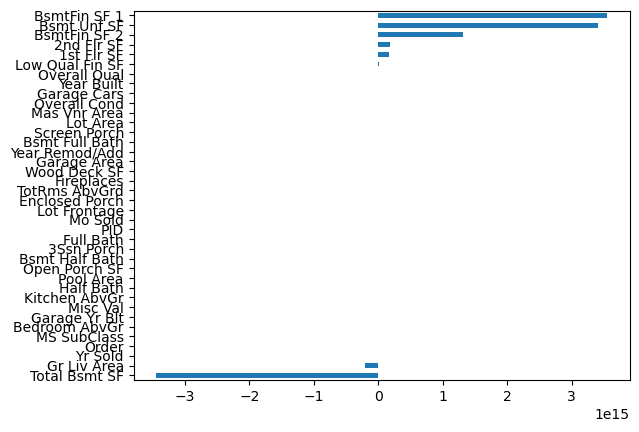

In [51]:
# let's check for coeff

(pd.Series(lr.coef_, index=x.columns)
 .sort_values()
 .plot.barh()
)

After standardization, the coefficients are now more comparable.The bar plot shows which features have the most influence on the model. 
- Square footage-related features (like basement square footage) are found to have a higher impact on the model.
- Intuitively, this makes sense since the size of the house (square footage) is likely a key determinant of its price.


In [53]:
(pd.Series(lr.coef_, index=x.columns)
 .sort_values()
 #.plot.barh()
)

Total Bsmt SF     -3.446970e+15
Gr Liv Area       -2.110392e+14
Yr Sold           -1.072459e+04
Order             -8.755962e+03
MS SubClass       -6.993341e+03
Bedroom AbvGr     -6.364515e+03
Garage Yr Blt     -5.755203e+03
Misc Val          -5.578304e+03
Kitchen AbvGr     -3.052038e+03
Half Bath         -2.705048e+03
Pool Area         -1.449753e+03
Open Porch SF     -4.146587e+02
Bsmt Half Bath    -3.629343e+02
3Ssn Porch        -1.422653e+02
Full Bath         -7.640614e+01
PID                1.687345e+02
Mo Sold            6.354114e+02
Lot Frontage       9.472846e+02
Enclosed Porch     1.356599e+03
TotRms AbvGrd      2.147308e+03
Fireplaces         2.301076e+03
Wood Deck SF       2.505710e+03
Garage Area        3.171714e+03
Year Remod/Add     3.672956e+03
Bsmt Full Bath     3.873249e+03
Screen Porch       3.998432e+03
Lot Area           4.059535e+03
Mas Vnr Area       4.746076e+03
Overall Cond       5.372853e+03
Garage Cars        7.756241e+03
Year Built         1.188778e+04
Overall 

<Axes: >

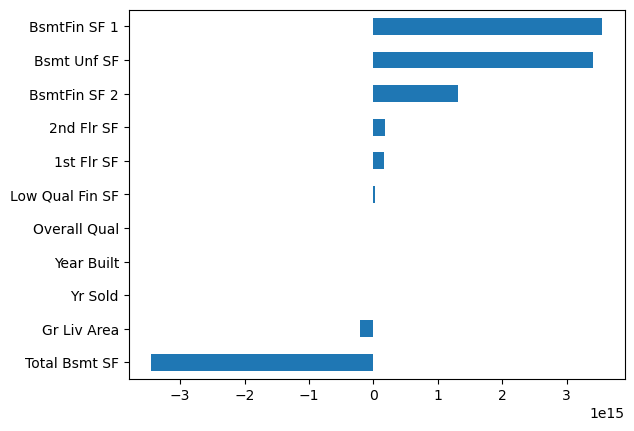

In [55]:
(pd.Series(lr.coef_, index=x.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() >1e4])
 .plot.barh()
)

OR

<Axes: >

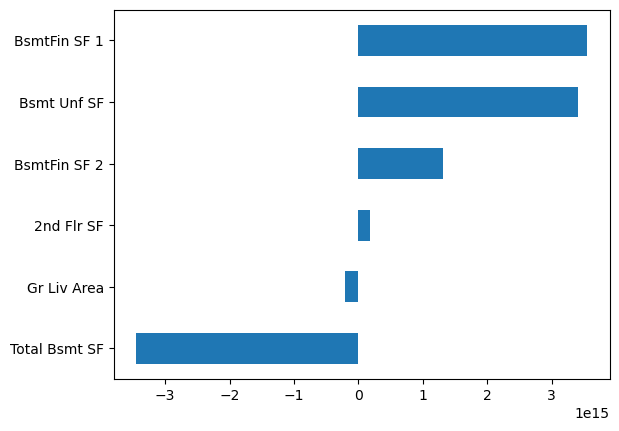

In [58]:
(pd.Series(lr.coef_, index=x.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > ser.abs().quantile(0.85)])
 .plot.barh()
)

In [60]:
(pd.Series(lr.coef_, index=x.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > ser.abs().quantile(0.85)])
 .index
)

Index(['Total Bsmt SF', 'Gr Liv Area', '2nd Flr SF', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'BsmtFin SF 1'],
      dtype='object')

In [62]:
simple_feats = set(['Kitchen AbvGr', 'Yr Sold', 'Bedroom AbvGr', 'Half Bath',
       'Bsmt Half Bath', 'MS SubClass', 'Full Bath', 'Year Remod/Add',
       'Mo Sold', 'Year Built', 'TotRms AbvGrd', 'Fireplaces', 'Overall Cond',
       'Bsmt Full Bath', 'Garage Cars', 'Overall Qual'])
std_feats = set(['Total Bsmt SF', '2nd Flr SF', '1st Flr SF', 'Low Qual Fin SF',
       'BsmtFin SF 2', 'Gr Liv Area', 'Bsmt Unf SF', 'BsmtFin SF 1'])
print(sorted(simple_feats | std_feats))

['1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Fireplaces', 'Full Bath', 'Garage Cars', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF', 'MS SubClass', 'Mo Sold', 'Overall Cond', 'Overall Qual', 'TotRms AbvGrd', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']


The `|` operator performs a union of the two sets, removing duplicates.

In [64]:
# Correlation

(x
 .assign(SalePrice=y)
 .corr()
 .loc[['SalePrice', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 
       'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Fireplaces', 'Full Bath', 
       'Garage Cars', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF',
       'MS SubClass', 'Mo Sold', 'Overall Cond', 'Overall Qual', 'TotRms AbvGrd', 
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']]
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
 .set_sticky(axis='index')
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
SalePrice,-0.031408,-0.246521,-0.085092,0.201875,0.266549,0.799262,-0.101697,0.558426,0.532974,0.502196,0.433147,0.006018,0.183308,0.632529,0.621676,0.269373,-0.037660,0.706780,0.275823,-0.035817,0.545604,0.285056,0.143913,-0.119814,0.495474,0.474558,0.253459,0.647562,0.640138,0.327143,0.312951,-0.128787,0.032225,0.112151,0.068403,-0.015691,0.035259,-0.030569,1.000000
1st Flr SF,-0.013201,-0.141902,-0.247828,0.241707,0.332235,0.477837,-0.157052,0.310463,0.242108,0.392280,0.457586,0.084710,0.296139,0.800429,1.000000,-0.250057,-0.012689,0.562166,0.257836,0.010469,0.371584,-0.104203,0.106648,0.076025,0.390162,0.406345,0.148019,0.439471,0.491208,0.227131,0.238041,-0.065713,0.044061,0.098316,0.121821,0.093003,0.040496,-0.013667,0.621676
2nd Flr SF,-0.000417,-0.003289,0.304237,-0.002813,0.032996,0.241402,0.006218,0.016828,0.158939,0.120159,-0.163710,-0.098188,0.002320,-0.204487,-0.250057,1.000000,0.018024,0.655251,-0.163068,-0.059458,0.404143,0.611634,0.504651,0.069444,0.585214,0.165844,0.041863,0.180882,0.127508,0.089097,0.184538,0.055429,-0.032172,0.011741,0.044602,-0.005078,0.013247,-0.018530,0.269373
Bedroom AbvGr,0.015424,0.006345,-0.019208,0.112718,0.136569,0.063291,-0.006137,-0.055093,-0.021536,0.080590,-0.118575,-0.033033,0.188508,0.052721,0.106648,0.504651,0.070531,0.516808,-0.161084,0.020333,0.359489,0.247053,1.000000,0.240737,0.672647,0.076971,-0.039056,0.091135,0.073417,0.029711,0.083650,0.052115,-0.047151,0.009250,0.036707,0.000887,0.053677,-0.018008,0.143913
Bsmt Full Bath,-0.042499,-0.038306,0.014187,0.019554,0.124208,0.168373,-0.043458,0.212119,0.134590,0.139684,0.640212,0.163634,-0.398629,0.326861,0.257836,-0.163068,-0.047215,0.057367,1.000000,-0.149027,-0.023011,-0.035385,-0.161084,-0.018349,-0.043642,0.172775,0.064050,0.162644,0.184903,0.187283,0.080765,-0.069014,0.027086,0.052355,0.043730,-0.004817,-0.003322,0.044805,0.275823
Bsmt Half Bath,0.024987,0.004154,-0.003179,-0.031798,0.026448,-0.041433,0.084185,-0.030515,-0.046175,0.016609,0.077687,0.099147,-0.105784,0.012850,0.010469,-0.059458,-0.013385,-0.043498,-0.149027,1.000000,-0.046371,-0.057999,0.020333,-0.064671,-0.048069,0.038089,0.001269,-0.033210,-0.021147,0.051546,-0.035276,-0.009272,0.026971,0.042372,0.066911,0.036996,0.022741,-0.019556,-0.035817
Bsmt Unf SF,0.005842,-0.088102,-0.129987,0.139290,0.023883,0.270527,-0.137303,0.129311,0.165397,0.089662,-0.477244,-0.238420,1.000000,0.412248,0.296139,0.002320,0.047207,0.235870,-0.398629,-0.105784,0.274901,-0.033530,0.188508,0.065651,0.251633,0.001790,0.013351,0.180080,0.164837,-0.039285,0.119143,0.006383,-0.005399,-0.047945,-0.031963,-0.010125,0.021915,-0.036443,0.183308
BsmtFin SF 1,-0.032268,-0.098674,-0.059767,0.067034,0.191692,0.284458,-0.051341,0.280069,0.152240,0.299951,1.000000,-0.054022,-0.477244,0.536731,0.457586,-0.163710,-0.066129,0.209944,0.640212,0.077687,0.078086,-0.008205,-0.118575,-0.086654,0.048118,0.296098,0.125831,0.255311,0.309649,0.224199,0.125150,-0.100318,0.050567,0.095952,0.084147,0.092900,-0.000884,0.022341,0.433147
BsmtFin SF 2,-0.002758,-0.001245,-0.070847,-0.005254,0.083198,-0.041122,0.040992,-0.027328,-0.061934,-0.014955,-0.054022,1.000000,-0.238420,0.090109,0.084710,-0.098188,-0.004989,-0.017996,0.163634,0.099147,-0.076262,-0.033004,-0.033033,-0.037864,-0.049288,0.067180,0.048849,-0.014118,0.003625,0.098591,-0.005516,0.032415,-0.023314,0.062978,0.044403,-0.005195,-0.009401,0.007089,0.006018
Fireplaces,-0.019156,-0.108056,-0.049955,0.051240,0.256989,0.393007,-0.031702,0.170672,0.133322,0.270051,0.296098,0.067180,0.001790,0.333

# Regression with XGBoost

Goals:

* Learn to use the XGBoost library (`xgboost`) for regression tasks.
* Evaluate the performance of the XGBoost model.
* Explore the importance of features in the XGBoost model using the feature importances.

Why XGBoost?

Extreme Gradient Boosting, a machine learning algorithm that builds a strong predictive model by combining many simple models—usually `decision trees`—in a step-by-step process.
- It first creates a simple decision tree that makes some predictions, although not perfectly. Then, it builds additional trees that specifically work to fix the mistakes made by the previous ones. This sequential process continues until the model becomes very accurate.
- known for its speed and efficiency. It includes smart features like `regularization (to help avoid overfitting)`, parallel processing (to `handle large datasets quickly`), and even built-in methods to `handle missing values`.

In [66]:
x = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, random_state=42)

std = preprocessing.StandardScaler().set_output(transform='pandas')
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

`.set_output(transform='pandas')`: This method is part of the scikit-learn 1.2+ API that allows transformers to retain and return pandas DataFrames when transforming data. By default, scikit-learn transformers like StandardScaler return NumPy arrays when we call .transform() or .fit_transform() — transformed data becomes less human-readable and harder to trace back to the original features (as we lose column names, & index labels.)

In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
import xgboost as xgb
# was .84
xg = xgb.XGBRegressor()
xg.fit(x_train, y_train)
xg.score(x_test, y_test)

0.9202607274055481

<Axes: >

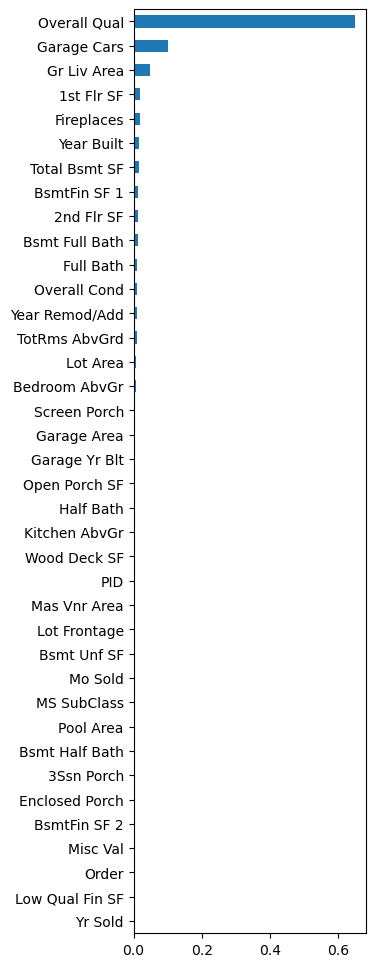

In [83]:
pd.Series(xg.feature_importances_, index=x_train.columns).sort_values().plot.barh(figsize=(3,12))

According to above XGBoost plot, the most influential features in predicting house prices are: 
- `Overall Quality` of the house
- `Garage Cars` (the number of cars that can fit in the garage)


In [146]:
# Use categories

x_cat = (housing.assign
         (**housing.select_dtypes('number').astype('Int64')).drop(columns='SalePrice'))
y_cat = housing.SalePrice
x_cat_train, x_cat_test, y_cat_train, y_cat_test = model_selection.train_test_split(x_cat, y_cat, random_state=42)

xg_cat = xgb.XGBRegressor(enable_categorical = True, tree_method = 'hist')
xg_cat.fit(x_cat_train, y_cat_train)
xg_cat.score(x_cat_test, y_cat_test)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:MS Zoning: object, Street: object, Alley: object, Lot Shape: object, Land Contour: object, Utilities: object, Lot Config: object, Land Slope: object, Neighborhood: object, Condition 1: object, Condition 2: object, Bldg Type: object, House Style: object, Roof Style: object, Roof Matl: object, Exterior 1st: object, Exterior 2nd: object, Mas Vnr Type: object, Exter Qual: object, Exter Cond: object, Foundation: object, Bsmt Qual: object, Bsmt Cond: object, Bsmt Exposure: object, BsmtFin Type 1: object, BsmtFin Type 2: object, Heating: object, Heating QC: object, Central Air: object, Electrical: object, Kitchen Qual: object, Functional: object, Fireplace Qu: object, Garage Type: object, Garage Finish: object, Garage Qual: object, Garage Cond: object, Paved Drive: object, Pool QC: object, Fence: object, Misc Feature: object, Sale Type: object, Sale Condition: object

Here, XGBoost is telling that the DataFrame contains object-type columns, which are not supported as-is when using `enable_categorical=True`. To use categorical features with enable_categorical=True, we `need to explicitly convert object-type columns to pandas category dtype`. 

In [125]:
# Convert object columns to category type for XGBoost

X_cat = housing.assign(**housing.select_dtypes('object').apply(lambda col: col.astype('category')))
X_cat = X_cat.drop(columns='SalePrice')

# Define the target variable
y_cat = housing.SalePrice

# Split the data into training and testing sets
X_cat_train, X_cat_test, y_cat_train, y_cat_test = model_selection.train_test_split(X_cat, y_cat, random_state=42)

# Train XGBoost model with categorical support, using the histogram-based algorithm
xg_cat = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')

# Fit the model
xg_cat.fit(X_cat_train, y_cat_train)

# Evaluate the model's performance
xg_cat.score(X_cat_test, y_cat_test)

0.921321451663971

<Axes: >

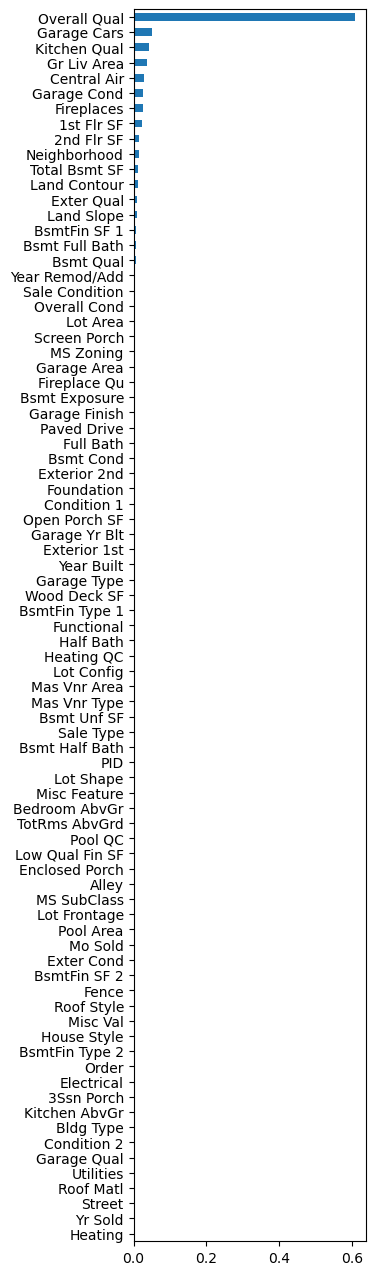

In [143]:
pd.Series(xg_cat.feature_importances_, index=xg_cat.feature_names_in_).sort_values().plot.barh(figsize=(3,16))

The inclusion of categorical data shows that neighborhood might be an important feature, as it reflects a possible divide between houses in fancier areas versus more affordable ones, which could influence house prices significantly.

Task
* Create a linear regression model using the top 5 features from the (non-categorical) XGBoost model
* What is the `.score` of the model?

`feature_importances_` attribute indicates the importance of each feature in predicting the target variable, based on the trained model. Also, feature importances are stored as a `NumPy array` which gives the relative importance of each feature.

In [169]:
Top5 = list(pd.Series(xg.feature_importances_, index = x_train.columns)
            .sort_values()         # sorts in ascending order by default — meaning least important to most important      
            .index[-5:]            # grabs the last 5 items, which are the top 5 most important features.
           )

In [171]:
Top5

['Fireplaces', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Overall Qual']

In [173]:
lr_top5 = linear_model.LinearRegression()
lr_top5.fit(x_train.loc[:, Top5], y_train)
lr_top5.score(x_test.loc[:, Top5], y_test)

0.7949314168664728

Here the score drops a little compared to the full model, this is expected as only a subset of features is being used.

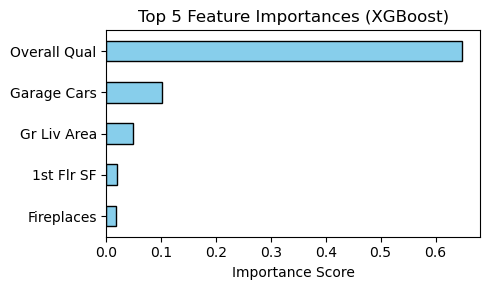

In [208]:
import matplotlib.pyplot as plt

pd.Series(xg.feature_importances_, index=x_train.columns)[Top5].sort_values().plot.barh(
    figsize=(5, 3), 
    color='skyblue',
    edgecolor='black'
)

plt.title("Top 5 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()